In [151]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pandas as pd
import time
import collections
import datetime as dt
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
sns.set(rc={'figure.figsize':(11.7,8.27)})
pd.options.display.float_format = '{:,.2f}'.format
np.random.seed(seed=123)

Functions

In [152]:
def line_plot(df, label1, label2):
    sns.set_style(style="white", rc={"grid.color": "white", 'axes.facecolor':'white', 
                               'figure.facecolor':'white'})
    g1 = sns.lineplot(data=df, x=df.index, y=label1, color = '#46464f',
                     label=label1, ci=None)
    g1.set_xlabel("", fontsize = 15)
    g1.set_ylabel(f"{label1}", fontsize = 15, color='#46464f')
    plt.legend(loc="upper right")
    ax = plt.twinx()
    g2 = sns.lineplot(data=df, x=df.index, y=label2, color = 'orange', 
                      label=label2, ci=None)
    ylabels = ['$' + '{:,.0f}'.format(x) for x in g2.get_yticks()]
    x_dates = df.index.strftime('%y-%m').unique()
    date_ticks = range(0, len(x_dates), 3)
    ax.set_xticklabels(labels=[x_dates[i] for i in date_ticks])
    g2.set_yticklabels(ylabels, color='orange', fontsize=15)
    g2.set_xlabel("", fontsize = 15)
    g2.set_ylabel("", fontsize = 15, color='orange')
    plt.legend(loc="upper left")

dataframes

In [153]:
link_google = r"C:\Users\PC\Downloads\multiTimeline PSG.csv"
link_price = r"C:\Users\PC\Downloads\PSG-USD.csv"
df1 = pd.read_csv(link_google, header=1, index_col=0) #PSG google
df1.index = pd.to_datetime(df1.index,  format='%Y-%m-%d')

df_price = pd.read_csv(link_price, index_col='Date') #PSG token price
df_price.index = pd.to_datetime(df_price.index,  format='%Y-%m-%d')
display(df_price)
display(df1)

df_price_search = df_price.join(df1).dropna(subset='Volume') \
.rename(columns={'ПСЖ: (По всему миру)': 'PSG_interest'})

display(df_price_search.isna().value_counts())
display(df_price_search.info())
df_price_search

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,9.12,9.99,9.12,9.94,9.94,2611504
2021-03-02,9.94,10.32,9.50,9.62,9.62,1690192
2021-03-03,9.63,10.52,9.61,10.10,10.10,1369495
2021-03-04,10.10,10.32,9.31,9.52,9.52,1576558
2021-03-05,9.54,9.76,9.11,9.43,9.43,814513
...,...,...,...,...,...,...
2023-05-11,4.95,4.95,4.60,4.69,4.69,2266318
2023-05-12,4.69,4.83,4.50,4.76,4.76,2645343
2023-05-13,4.76,4.76,4.67,4.73,4.73,1533490


,ПСЖ: (По всему миру)
Неделя,
2018-05-20,2
2018-05-27,2
2018-06-03,1
2018-06-10,1
2018-06-17,1
...,...
2023-04-09,12
2023-04-16,13
2023-04-23,4


Open   High   Low    Close  Adj Close  Volume  PSG_interest
False  False  False  False  False      False   True            692
                                               False           114
dtype: int64

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 806 entries, 2021-03-01 to 2023-05-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          806 non-null    float64
 1   High          806 non-null    float64
 2   Low           806 non-null    float64
 3   Close         806 non-null    float64
 4   Adj Close     806 non-null    float64
 5   Volume        806 non-null    int64  
 6   PSG_interest  114 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 82.7 KB


None

,Open,High,Low,Close,Adj Close,Volume,PSG_interest
Date,,,,,,,
2021-03-01,9.12,9.99,9.12,9.94,9.94,2611504,NaN
2021-03-02,9.94,10.32,9.50,9.62,9.62,1690192,NaN
2021-03-03,9.63,10.52,9.61,10.10,10.10,1369495,NaN
2021-03-04,10.10,10.32,9.31,9.52,9.52,1576558,NaN
2021-03-05,9.54,9.76,9.11,9.43,9.43,814513,NaN
...,...,...,...,...,...,...,...
2023-05-11,4.95,4.95,4.60,4.69,4.69,2266318,NaN
2023-05-12,4.69,4.83,4.50,4.76,4.76,2645343,NaN
2023-05-13,4.76,4.76,4.67,4.73,4.73,1533490,NaN


Add prices and users' attention to club (not token)

C:\Users\PC\AppData\Local\Temp\ipykernel_99376\3973019542.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=[x_dates[i] for i in date_ticks])
C:\Users\PC\AppData\Local\Temp\ipykernel_99376\3973019542.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  g2.set_yticklabels(ylabels, color='orange', fontsize=15)


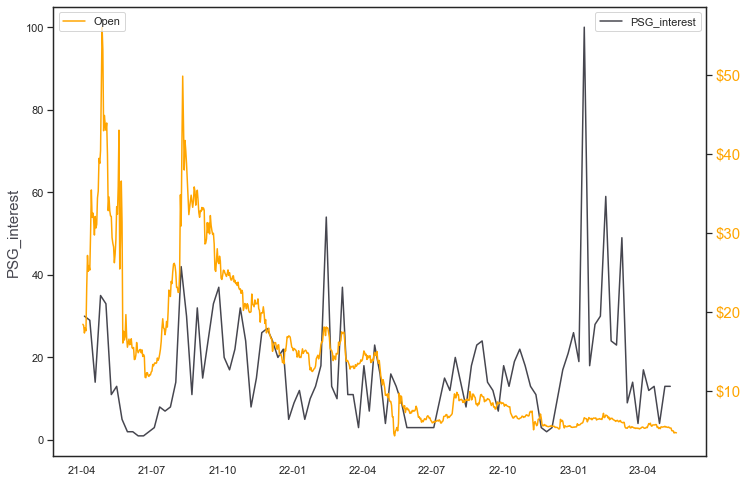

In [154]:
line_plot(df_price_search[df_price_search.index > '2021-04-01'], 'PSG_interest', 'Open')

Correlation between price & PSG interest

In [155]:
corr_list = []
for i in range(0, df_price_search.dropna().shape[0]):
    corr_list.append(df_price_search.dropna().iloc[i: i+10][['PSG_interest', 'Open']].corr().iloc[1,0])
df_price_search = df_price_search.dropna(subset='PSG_interest')
df_price_search = df_price_search.join(pd.DataFrame(np.round(corr_list, 2), 
                index = df_price_search.index, columns=['corr_PSG_Price']))
df_price_search

,Open,High,Low,Close,Adj Close,Volume,PSG_interest,corr_PSG_Price
Date,,,,,,,,
2021-03-07,9.86,10.43,9.73,10.11,10.11,2692394,32.00,0.20
2021-03-14,26.72,26.85,22.87,23.10,23.10,17681075,9.00,0.45
2021-03-21,20.78,23.76,19.53,20.11,20.11,21088699,6.00,0.38
2021-03-28,18.67,19.45,18.51,18.76,18.76,6466420,5.00,0.45
2021-04-04,17.33,18.44,17.20,18.01,18.01,4406567,30.00,0.49
...,...,...,...,...,...,...,...,...
2023-04-09,5.88,6.71,5.65,5.75,5.75,18984794,12.00,0.44
2023-04-16,5.70,5.74,5.66,5.72,5.72,2745936,13.00,0.51
2023-04-23,5.33,5.38,5.21,5.24,5.24,1996172,4.00,0.46


In [156]:
#https://seaborn.pydata.org/tutorial/color_palettes.html
df_price_search.index = df_price_search.index.strftime('%y-%m-%d')
df_price_search[['corr_PSG_Price']].round(2).dropna().style \
.background_gradient(cmap='vlag', text_color_threshold=0)

,corr_PSG_Price
Date,
21-03-07,0.200000
21-03-14,0.450000
21-03-21,0.380000
21-03-28,0.450000
21-04-04,0.490000
21-04-11,0.760000
21-04-18,0.880000
21-04-25,0.880000
21-05-02,0.870000


Scharnowski, Matthias and Scharnowski, Stefan and Zimmermann, Lukas, Fan Tokens: Sports and Speculation on the Blockchain (December 23, 2021). Available at SSRN: https://ssrn.com/abstract=3992430 or http://dx.doi.org/10.2139/ssrn.3992430


Fan tokens price factors:

* Game of a day, match results

* BTC, ETH, BNB, CHZ price fluctuations

* Period lags

* US economy fluctuations, statistical reports